**<h2>Parks</h2>**

https://data.wprdc.org/dataset/parks

This dataset looks at parks located in the different neighborhoods of Pittsburgh. From the perspective of a dog, they would want to be in an area with numerous parks to play and run around in; thus, the neighborhood with the largest number of parks is the one considered the best as that means a wider range of options.

In [20]:
#importing pandas and everything else we need!
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
park_data = pd.read_csv("https://data.wprdc.org/datastore/dump/fa329e3d-89ff-4708-8ddf-81bfedcad11d", index_col="_id")

park_data.head(5)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


Here's what the raw data looks like using the first 5 rows!

In [24]:
type = park_data['type'].str.contains("Park")

park = park_data[type]
park.head(15)

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,
1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
6,223959093,Allegheny Riverfront Park,Park,Parks - Northern,NaN,Central Business District,6,2,42003020100,6,2,2,1-3,40.444591,-80.002416
7,1596467340,Alpine Gardens Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457673,-80.012852
8,1829922263,Alton Park,Park,Parks - Southern,NaN,Beechview,4,19,42003191600,5,19,6,4-28,40.414580,-80.021855
10,1047118140,Ammon Park,Park,Parks - Schenley,NaN,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449526,-79.978247


Because some of the data under "type" aren't truly parks (like being listed as traffic island/median and building grounds instead), we need to filter it out so only parks show as the type.

---

In [45]:
park.loc[park['neighborhood'].str.contains("Oakland"), 'neighborhood'] = "Oakland"
park.loc[park['neighborhood'].str.contains("Squirrel Hill"), 'neighborhood'] = "Squirrel Hill"
print(park['neighborhood'].unique())

['Beechview' 'Crawford-Roberts' 'North Shore' 'Allegheny Center'
 'Central Business District' 'Central Northside' 'Bedford Dwellings'
 'South Side Slopes' 'South Side Flats' 'Lower Lawrenceville' 'Banksville'
 'Homewood North' 'Hazelwood' 'Bon Air' 'Oakland' 'Brighton Heights'
 'Brookline' 'Spring Garden' 'Lincoln-Lemington-Belmar' 'Windgap'
 'Troy Hill' 'Westwood' 'Perry South' 'Homewood West' 'Squirrel Hill'
 'Strip District' 'Arlington' 'Stanton Heights' 'Crafton Heights'
 'Upper Lawrenceville' 'East Carnegie' 'East Hills' 'East Liberty'
 'Allentown' 'Duquesne Heights' 'Mount Washington' 'Esplen' 'Fairywood'
 'Fineview' 'Garfield' 'Greenfield' 'Bloomfield' 'Perry North' 'Hays'
 'Elliott' 'Highland Park' 'Homewood South' 'Morningside'
 'Terrace Village' 'Larimer' 'Spring Hill-City View' 'Carrick'
 'Central Lawrenceville' 'Lincoln Place' 'Manchester' 'Marshall-Shadeland'
 'Sheraden' 'Beltzhoover' 'Point Breeze' 'Oakwood' 'Upper Hill'
 'New Homestead' 'Swisshelm Park' 'Bluff' 'Middle H

We're going to combine the different Oaklands (North, South, West, and Central) into one neighborhood called "Oakland" and the different sections of Squirrel Hill (South vs North) into simply "Squirrel Hill" to narrow down the possible options. Listed here are all the unique neighborhoods in our dataset!

---

In [49]:
best = park['neighborhood'].value_counts().reset_index(name='number of parks').head(20)
print(best)

             neighborhood  number of parks
0               Beechview                6
1                 Oakland                6
2       South Side Slopes                6
3               Hazelwood                5
4        Mount Washington                5
5               Troy Hill                5
6                Sheraden                4
7            East Liberty                4
8           Squirrel Hill                4
9      Marshall-Shadeland                4
10                Elliott                4
11               Garfield                3
12             Bloomfield                3
13       Crawford-Roberts                3
14             Manchester                3
15    Upper Lawrenceville                3
16                Carrick                3
17            Beltzhoover                3
18  Spring Hill-City View                3
19            North Shore                3


Afterwards, we need to figure out which neighborhood has the greatest number of parks. Listed here is the top 20 neighborhoods; from this, we can see that Beechview, Oakland, and South Side Slopes have the most parks with 6, closely followed by Troy Hill, Hazelwood, and Mount Washington with 5 parks.

---

<Axes: xlabel='neighborhood'>

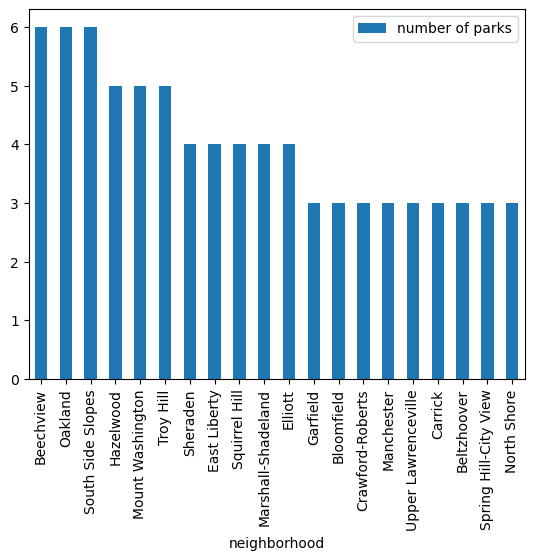

In [52]:
best.plot.bar(x='neighborhood', y='number of parks')

To make it a little bit easier to see, here is a visual representation of the neighborhoods and their corresponding number of parks. To conclude, solely based on my data, the best neighborhood(s) as a dog would be either Beechview, Oakland, or South Side Slopes.